<a href="https://colab.research.google.com/github/alanmejiaa/Datos-Masivos/blob/main/Practica%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica 5

In [1]:
#PASO 0. INSTALACION DE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from numpy import array
from numpy import append

In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [3]:
serieP=array([10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23])
print(serieP)

[10 25 23 14 25 23 14 85 14 36 10 25 23 14 25 23 14 85 14 36 10 25 23 14
 25 23 14 85 14 36 10 25 23 14 25 23]


In [4]:
def DescomponerSerie(serie,longitud):
    global X, y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final > len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)

In [5]:
DescomponerSerie(serieP,12)

(array([[10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14],
        [14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36],
        [36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10],
        [10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 1

In [6]:
for i in range(len(X)):
    print(X[i], y[i])

[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23


In [27]:
#PASO 1. LEER LA BASE DE DATOS
PP = pd.read_csv("diabetes.csv")
PP.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [28]:
columnas_a_dejar = ["Age","Glucose"]
PP = PP[columnas_a_dejar]
PP.head()

,Age,Glucose
0,50,148
1,31,85
2,32,183
3,21,89
4,33,137


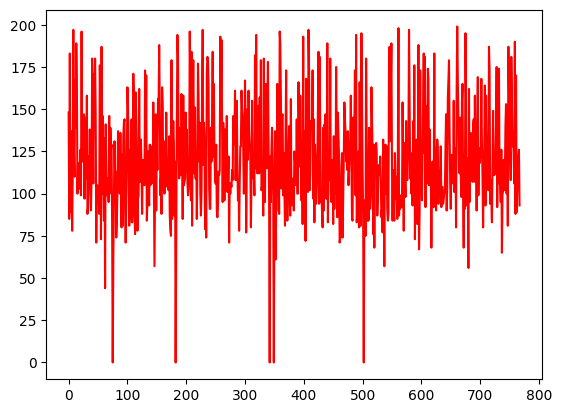

In [29]:
plt.plot(PP["Glucose"],color="red")

In [33]:
Secuencia = list(PP["Glucose"])
print(Secuencia)

[148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139, 189, 166, 100, 118, 107, 103, 115, 126, 99, 196, 119, 143, 125, 147, 97, 145, 117, 109, 158, 88, 92, 122, 103, 138, 102, 90, 111, 180, 133, 106, 171, 159, 180, 146, 71, 103, 105, 103, 101, 88, 176, 150, 73, 187, 100, 146, 105, 84, 133, 44, 141, 114, 99, 109, 109, 95, 146, 100, 139, 126, 129, 79, 0, 62, 95, 131, 112, 113, 74, 83, 101, 137, 110, 106, 100, 136, 107, 80, 123, 81, 134, 142, 144, 92, 71, 93, 122, 163, 151, 125, 81, 85, 126, 96, 144, 83, 95, 171, 155, 89, 76, 160, 146, 124, 78, 97, 99, 162, 111, 107, 132, 113, 88, 120, 118, 117, 105, 173, 122, 170, 84, 96, 125, 100, 93, 129, 105, 128, 106, 108, 108, 154, 102, 57, 106, 147, 90, 136, 114, 156, 153, 188, 152, 99, 109, 88, 163, 151, 102, 114, 100, 131, 104, 148, 120, 110, 111, 102, 134, 87, 79, 75, 179, 85, 129, 143, 130, 87, 119, 0, 73, 141, 194, 181, 128, 109, 139, 111, 123, 159, 135, 85, 158, 105, 107, 109, 148, 113, 138, 108, 99, 103, 111, 196, 162, 96, 184, 81, 1

In [34]:
DescomponerSerie(Secuencia,12)

(array([[148,  85, 183, ..., 125, 110, 168],
        [ 85, 183,  89, ..., 110, 168, 139],
        [183,  89, 137, ..., 168, 139, 189],
        ...,
        [181, 154, 128, ...,  89, 101, 122],
        [154, 128, 137, ..., 101, 122, 121],
        [128, 137, 123, ..., 122, 121, 126]]),
 array([139, 189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143,
        125, 147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,
         90, 111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103,
        101,  88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141,
        114,  99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,
         95, 131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,
         80, 123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,
         81,  85, 126,  96, 144,  83,  95, 171, 155,  89,  76, 160, 146,
        124,  78,  97,  99, 162, 111, 107, 132, 113,  88, 120, 118, 117,
        105, 173, 122, 170,  84,  96, 125, 100,  93, 129, 

In [35]:
DescomponerSerie(Secuencia,12)

(array([[148,  85, 183, ..., 125, 110, 168],
        [ 85, 183,  89, ..., 110, 168, 139],
        [183,  89, 137, ..., 168, 139, 189],
        ...,
        [181, 154, 128, ...,  89, 101, 122],
        [154, 128, 137, ..., 101, 122, 121],
        [128, 137, 123, ..., 122, 121, 126]]),
 array([139, 189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143,
        125, 147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,
         90, 111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103,
        101,  88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141,
        114,  99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,
         95, 131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,
         80, 123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,
         81,  85, 126,  96, 144,  83,  95, 171, 155,  89,  76, 160, 146,
        124,  78,  97,  99, 162, 111, 107, 132, 113,  88, 120, 118, 117,
        105, 173, 122, 170,  84,  96, 125, 100,  93, 129, 

In [36]:
for i in range(len(X)):
    print(X[i], y[i])

[148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168] 139
[85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139] 189
[183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139, 189] 166
[89, 137, 116, 78, 115, 197, 125, 110, 168, 139, 189, 166] 100
[137, 116, 78, 115, 197, 125, 110, 168, 139, 189, 166, 100] 118
[116, 78, 115, 197, 125, 110, 168, 139, 189, 166, 100, 118] 107
[78, 115, 197, 125, 110, 168, 139, 189, 166, 100, 118, 107] 103
[115, 197, 125, 110, 168, 139, 189, 166, 100, 118, 107, 103] 115
[197, 125, 110, 168, 139, 189, 166, 100, 118, 107, 103, 115] 126
[125, 110, 168, 139, 189, 166, 100, 118, 107, 103, 115, 126] 99
[110, 168, 139, 189, 166, 100, 118, 107, 103, 115, 126, 99] 196
[168, 139, 189, 166, 100, 118, 107, 103, 115, 126, 99, 196] 119
[139, 189, 166, 100, 118, 107, 103, 115, 126, 99, 196, 119] 143
[189, 166, 100, 118, 107, 103, 115, 126, 99, 196, 119, 143] 125
[166, 100, 118, 107, 103, 115, 126, 99, 196, 119, 143, 125] 147
[100, 118, 107, 103, 115, 126, 99, 196, 119,

In [37]:
# define model
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=12))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='ADAM', metrics=['accuracy'])

In [38]:
#TRAIN THE MODEL
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
76/76 [==============================] - 2s 2ms/step - loss: 20563.4512 - accuracy: 0.0026
Epoch 2/10
76/76 [==============================] - 0s 2ms/step - loss: 1946.8739 - accuracy: 0.0000e+00
Epoch 3/10
76/76 [==============================] - 0s 2ms/step - loss: 1413.3735 - accuracy: 0.0000e+00
Epoch 4/10
76/76 [==============================] - 0s 2ms/step - loss: 1393.7289 - accuracy: 0.0000e+00
Epoch 5/10
76/76 [==============================] - 0s 2ms/step - loss: 1376.0222 - accuracy: 0.0000e+00
Epoch 6/10
76/76 [==============================] - 0s 2ms/step - loss: 1354.9290 - accuracy: 0.0000e+00
Epoch 7/10
76/76 [==============================] - 0s 2ms/step - loss: 1337.5515 - accuracy: 0.0000e+00
Epoch 8/10
76/76 [==============================] - 0s 2ms/step - loss: 1320.1736 - accuracy: 0.0000e+00
Epoch 9/10
76/76 [==============================] - 0s 2ms/step - loss: 1296.6097 - accuracy: 0.0000e+00
Epoch 10/10
76/76 [==============================] - 0s 2m

In [39]:
#PREDICCIONES`
print("Generate predictions for 12 samples")
predictions = model.predict(X)
print("predictions shape:", predictions)

Generate predictions for 12 samples
24/24 [==============================] - 0s 2ms/step
predictions shape: [[122.61841 ]
 [105.67202 ]
 [158.4179  ]
 [123.461815]
 [134.1243  ]
 [141.88718 ]
 [118.357506]
 [123.08978 ]
 [168.54689 ]
 [130.65265 ]
 [125.06671 ]
 [139.76115 ]
 [108.650925]
 [132.21078 ]
 [128.69606 ]
 [109.01833 ]
 [128.5826  ]
 [133.49829 ]
 [115.117874]
 [142.3581  ]
 [128.80475 ]
 [112.008835]
 [147.18967 ]
 [124.08481 ]
 [114.738754]
 [131.09862 ]
 [124.71266 ]
 [ 98.93599 ]
 [123.87813 ]
 [113.90776 ]
 [111.884346]
 [135.00247 ]
 [100.962944]
 [117.86266 ]
 [137.3451  ]
 [124.285965]
 [133.74915 ]
 [130.69307 ]
 [129.50063 ]
 [125.63427 ]
 [157.72069 ]
 [127.65119 ]
 [107.60665 ]
 [134.18062 ]
 [107.78617 ]
 [125.9384  ]
 [114.67572 ]
 [113.4347  ]
 [125.80699 ]
 [111.99167 ]
 [130.53394 ]
 [127.59211 ]
 [ 95.02694 ]
 [147.28693 ]
 [125.28441 ]
 [100.248375]
 [121.326584]
 [ 87.44123 ]
 [131.74107 ]
 [ 98.23897 ]
 [108.782234]
 [123.2361  ]
 [ 88.408394]
 [116.2350

In [40]:
Predictions=pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()

,Predictions
0,122.618408
1,105.672020
2,158.417892
3,123.461815
4,134.124298


In [41]:
Real=pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()

,Real
0,139
1,189
2,166
3,100
4,118


In [42]:
RealPredictions=pd.concat([Predictions,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Predictions,Real
0,122.618408,139
1,105.672020,189
2,158.417892,166
3,123.461815,100
4,134.124298,118


<Axes: >

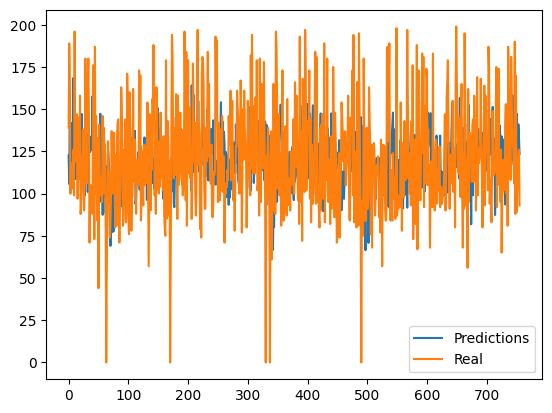

In [43]:
RealPredictions.plot(y=['Predictions','Real'])

In [47]:
# demonstrate prediction
x_input = array([237.71,237.04,230.72,230.35,235.99,237.58,235.46,232.34,236.48,235.24,231.85,235.77])
x_input = x_input.reshape((1, 12))
x_input

array([[237.71, 237.04, 230.72, 230.35, 235.99, 237.58, 235.46, 232.34,
        236.48, 235.24, 231.85, 235.77]])

In [48]:
valores_nuevos=[]
for i in range(12):
    # Predecir el siguiente valor basado en los datos iniciales
    siguiente_valor = model.predict(np.reshape(x_input,(1,12)))

    # Agregar el siguiente valor a los datos iniciales para la siguiente iteración
    x_input = np.append(x_input, siguiente_valor)
    x_input = x_input[1:]  # Descartar el primer valor para mantener solo los últimos 12

    # Guardarlos un arreglo
    valores_nuevos.append(siguiente_valor)

1/1 [==============================] - 0s 25ms/step


In [49]:
valores_nuevos = np.array(valores_nuevos)
print(valores_nuevos)

[[[229.53215]]

 [[230.19922]]

 [[229.51007]]

 [[228.72261]]

 [[227.78767]]

 [[229.44398]]

 [[228.59273]]

 [[225.55244]]

 [[227.02878]]

 [[224.976  ]]

 [[223.60646]]

 [[224.75764]]]


En mi proyecto estaba usando la variable de respuesta Outcome, pero note que no era tan preciso debido a que era un dato binomial por lo que en esta ocasion decidi usar el nivel de glucosa en las personas, una buena variable con la que se puede comparar es contra la edad de las personas, como mejora podriamos intentar usar distintos modelos como lo hice en el proyceto, pero aplicarlos para el nivel de glucosa.